![example](images/director_shot.jpeg)

# Project Title

**Authors:** Melvin Garcia
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

The aim of this report is derive insights on what makes a movie successful (and is not) from data ranging between IMDB, Rotten Tomatoes, Box Office Mojo, TheMovieDB.org and the-numbers.com. These data insights / analyses on the movie industry are intended to help Microsoft stakeholders make informed decisions on how to make an entryway into the movie industry. By exploring, and analyzing the trends, and categories of successful and not successful movies in the industry, the takeaway for our Microsoft stakeholders is to empower them with data these insights to strategically position themselves to create their own movie studio. The method to observe successful movies throughout our movie database was through analyzing the profits of movies at different budget levels and genres. Profits are defined as X times the original production budget -- "how many X times in domestic and worldwide gross did a movie make over their production budget. It was observed that while the genres Action, Adventure, Comedy, Drama, Thriller generate the most revenue in domestic and worldwide gross, the most profitable movie genres are Horror, Mystery, Documentary, Sport and Romance. To dial down further examining the average rating for the most profitable genres -- Horror and Romance 1 & 2 respectively for the higher rated movies with documentaries having the widest spread. As a result, it would be recommended as a start to consider a movie in these genre classes and as a follow-up investigate an appropriate movie director to reach out to for Microsoft's first movie.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data visualization packages
import seaborn as sns
import plotly.express as px
from pylab import rcParams

%matplotlib inline

In [2]:
# Here you run your code to explore the data

# Connect to DB
import sqlite3
conn = sqlite3.connect('data\movies.db')
cur  = conn.cursor()

## Import schema of DB to reference and explore

- Box Office Mojo (bom)
- IMDB (imdb)
- Rotten Tomatoes (rotten_tomatoes)
- TheMovieDB.org (tmdb)
- the-numbers.com (tn)

![movies.db schema](images/movies_db_schema.png)

## Explore the data
Run a few simple queries to get a sense of what kind of data is contained within the tables from the above schema

In [226]:
sql_query = cur.execute("""SELECT * FROM rotten_tomatoes_movies;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [148]:
sql_query = cur.execute("""SELECT * FROM tmdb_movies;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
sql_query = cur.execute("""SELECT * FROM imdb_title_principals LIMIT 5;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,tconst,ordering,nconst,category,job,characters
0,0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,1,tt0111414,2,nm0398271,director,None,None
2,2,tt0111414,3,nm3739909,producer,producer,None
3,3,tt0323808,10,nm0059247,editor,None,None
4,4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [6]:
sql_query = cur.execute("""SELECT * FROM bom_movie_gross LIMIT 5;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010


For example, you could identify the top performing genres and then only investigate the characteristics of films with those genres.

- Aim to look define 'successful' in number of ways top grossing, rotten tomatoes ratings, imdb ratings etc

Define function to more conveniently, read in SQL query and return pandas dataframe

In [9]:
def pandas_df_sql(query):
    """
    Purpose of this function is take in string type sql query. If the table is properly loaded in the environment,
    the function will return the SQL query result in a pandas dataframe.
    
    Params
    :query - String SQL query
    """
    query_cur = cur.execute(query).fetchall()
    df = pd.DataFrame(query_cur)
    df.columns = [x[0] for x in cur.description]
    
    return df

Get movies by imdb title, bom_movie_gross, tmdb_movies and tn_movie_budgets

Experiment with the query below

In [10]:
movie_budgetgross_query = """
SELECT * FROM imdb_title_basics itb
JOIN bom_movie_gross bmg ON itb.primary_title = bmg.title
JOIN tn_movie_budgets tmb ON tmb.movie = itb.primary_title;
"""

movie_gross_df = pandas_df_sql(movie_budgetgross_query)
movie_gross_df.info()
movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                1602 non-null   int64  
 1   tconst             1602 non-null   object 
 2   primary_title      1602 non-null   object 
 3   original_title     1602 non-null   object 
 4   start_year         1602 non-null   int64  
 5   runtime_minutes    1502 non-null   float64
 6   genres             1576 non-null   object 
 7   idx                1602 non-null   int64  
 8   title              1602 non-null   object 
 9   studio             1602 non-null   object 
 10  domestic_gross     1601 non-null   float64
 11  foreign_gross      1372 non-null   object 
 12  year               1602 non-null   int64  
 13  idx                1602 non-null   int64  
 14  id                 1602 non-null   int64  
 15  release_date       1602 non-null   object 
 16  movie              1602 

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",904,On the Road,IFC,744000.0,8000000,2012,2316,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
1,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1169,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,436,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
2,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1577,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,2066,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
3,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015,33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
4,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",474,The Rum Diary,FD,13100000.0,10800000,2011,1315,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"


Check for duplicates on primary_title column

In [11]:
movie_gross_df[movie_gross_df.duplicated(['primary_title'])].sort_values('primary_title')

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
622,15256,tt1734060,50/50,50/50,2010,77.0,Documentary,448,50/50,Sum.,35000000.0,4200000,2011,3872,73,"Sep 30, 2011",50/50,"$8,000,000","$35,016,118","$41,334,735"
778,25786,tt2027265,A Better Life,Une vie meilleure,2011,110.0,Drama,581,A Better Life,Sum.,1800000.0,None,2011,3683,84,"Jun 24, 2011",A Better Life,"$10,000,000","$1,759,252","$1,884,251"
1488,113035,tt6644200,A Quiet Place,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",3108,A Quiet Place,Par.,188000000.0,152900000,2018,2865,66,"Apr 6, 2018",A Quiet Place,"$17,000,000","$188,024,361","$334,522,294"
1549,128101,tt7867360,Abduction,Abduction,2019,106.0,"Action,Sci-Fi",409,Abduction,LGF,28100000.0,54000000,2011,1695,96,"Sep 23, 2011",Abduction,"$35,000,000","$28,087,155","$86,648,359"
913,36659,tt2335176,Abduction,Abduction,2013,NaN,Drama,409,Abduction,LGF,28100000.0,54000000,2011,1695,96,"Sep 23, 2011",Abduction,"$35,000,000","$28,087,155","$86,648,359"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,75016,tt4283448,Wonder Woman,Wonder Woman,2016,75.0,"Documentary,Drama,Sport",2767,Wonder Woman,WB,412600000.0,409300000,2017,154,55,"Jun 2, 2017",Wonder Woman,"$150,000,000","$412,563,408","$821,133,378"
1489,113152,tt6654316,Youth,Fang hua,2017,135.0,"Drama,Romance,War",2077,Youth,FoxS,2700000.0,None,2015,3298,99,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573"
1113,56684,tt3312830,Youth,Youth,2015,124.0,"Comedy,Drama,Music",2077,Youth,FoxS,2700000.0,None,2015,3298,99,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573"
1415,97229,tt5671384,Youth,Youth,2016,124.0,Drama,2077,Youth,FoxS,2700000.0,None,2015,3298,99,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573"


**Notes:**

Notably the joins are not perfect between the three tables. 

Movies of the same name may be joined when releasing on totally different years and different movie gross results. 

Possibly set up a unique key like title + year to join on. However, this assumes that movies of that same name would not be produced in the same year.

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

Get movies by imdb title, bom_movie_gross, tmdb_movies and tn_movie_budgets

In [150]:
movie_budgetgross_query = """
SELECT 
    *
FROM imdb_title_basics itb
JOIN bom_movie_gross bmg
ON itb.primary_title = bmg.title AND itb.start_year = bmg.year
JOIN
    (
    SELECT 
        movie,
        SUBSTR(release_date, LENGTH(release_date) - 3, 4)as year,
        production_budget,
        domestic_gross tnb_domestic_gross,
        worldwide_gross
    FROM tn_movie_budgets
    ) tnb
ON tnb.movie = itb.primary_title AND tnb.year = itb.start_year
JOIN
    (
    SELECT 
        title,
        SUBSTR(release_date, 1, 4)as year,
        popularity
    FROM tmdb_movies
    ) tmdb
ON tnb.movie = tmdb.title AND tnb.year = tmdb.year
"""

movie_gross_df = pandas_df_sql(movie_budgetgross_query)

# Use .info() to examine the data types (should any columns be converted) and null values (should any be handled)
movie_gross_df.info()

# Peek data
movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 1138 non-null   int64  
 1   tconst              1138 non-null   object 
 2   primary_title       1138 non-null   object 
 3   original_title      1138 non-null   object 
 4   start_year          1138 non-null   int64  
 5   runtime_minutes     1133 non-null   float64
 6   genres              1137 non-null   object 
 7   idx                 1138 non-null   int64  
 8   title               1138 non-null   object 
 9   studio              1138 non-null   object 
 10  domestic_gross      1137 non-null   float64
 11  foreign_gross       1030 non-null   object 
 12  year                1138 non-null   int64  
 13  movie               1138 non-null   object 
 14  year                1138 non-null   object 
 15  production_budget   1138 non-null   object 
 16  tnb_do

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1169,The Secret Life of Walter Mitty,Fox,...,129900000,2013,The Secret Life of Walter Mitty,2013,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,2013,10.743
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1577,A Walk Among the Tombstones,Uni.,...,26900000,2014,A Walk Among the Tombstones,2014,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,2014,19.373
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1873,Jurassic World,Uni.,...,"1,019.4",2015,Jurassic World,2015,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,2015,20.709
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",474,The Rum Diary,FD,...,10800000,2011,The Rum Diary,2011,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,2011,12.011
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",823,The Three Stooges,Fox,...,10500000,2012,The Three Stooges,2012,"$30,000,000","$44,338,224","$54,052,249",The Three Stooges,2012,9.358


Convert production_budget, domestic_gross and worldwide_gross to int type.
Remove '$' and commas

In [151]:
string_to_int_cols = ['production_budget','tnb_domestic_gross','worldwide_gross']

for col in string_to_int_cols:
    movie_gross_df[col] = movie_gross_df[col].apply(lambda x: x.replace('$','').replace(',',''))
    movie_gross_df[col] = movie_gross_df[col].astype(int)

movie_gross_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1169,The Secret Life of Walter Mitty,Fox,...,129900000,2013,The Secret Life of Walter Mitty,2013,91000000,58236838,187861183,The Secret Life of Walter Mitty,2013,10.743
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1577,A Walk Among the Tombstones,Uni.,...,26900000,2014,A Walk Among the Tombstones,2014,28000000,26017685,62108587,A Walk Among the Tombstones,2014,19.373
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1873,Jurassic World,Uni.,...,"1,019.4",2015,Jurassic World,2015,215000000,652270625,1648854864,Jurassic World,2015,20.709
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",474,The Rum Diary,FD,...,10800000,2011,The Rum Diary,2011,45000000,13109815,21544732,The Rum Diary,2011,12.011
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",823,The Three Stooges,Fox,...,10500000,2012,The Three Stooges,2012,30000000,44338224,54052249,The Three Stooges,2012,9.358


Create column to get most budget-gross ratio or profit

### Set up metrics for measuring profits
Let's use **domestic_gross_budget_ratio** and **worldwide_gross_budget_ratio** as initial metrics for indicators of movie success. This ratio is to signify 'X' times the movie gross over their production budget.

In [152]:
movie_gross_df['domestic_gross_budget_ratio'] = movie_gross_df['tnb_domestic_gross'] / movie_gross_df['production_budget']
movie_gross_df['worldwide_gross_budget_ratio'] = movie_gross_df['worldwide_gross'] / movie_gross_df['production_budget']
movie_gross_df.sort_values('worldwide_gross_budget_ratio',ascending=False,inplace=True)
movie_gross_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio
730,35625,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",1986,The Gallows,WB (NL),...,The Gallows,2015,100000,22764410,41656474,The Gallows,2015,9.166,227.644100,416.564740
397,9487,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,795,The Devil Inside,Par.,...,The Devil Inside,2012,1000000,53262945,101759490,The Devil Inside,2012,7.403,53.262945,101.759490
383,8964,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,39,Paranormal Activity 2,Par.,...,Paranormal Activity 2,2010,3000000,84752907,177512032,Paranormal Activity 2,2010,8.163,28.250969,59.170677
1055,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",2794,Get Out,Uni.,...,Get Out,2017,5000000,176040665,255367951,Get Out,2017,24.739,35.208133,51.073590
635,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,Chernobyl Diaries,2012,1000000,18119640,42411721,Chernobyl Diaries,2012,14.658,18.119640,42.411721


Points to investigate
- Consider dropping outliers
- Bucket the budgets 
- Create these bins --> scatter plots of ratings vs ratios (where can we see the linear relationship)

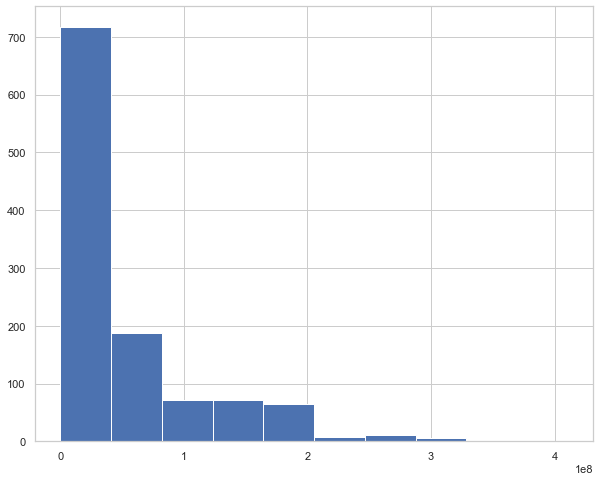

In [153]:
# Observe the distribution of production budget of movies
movie_gross_df.production_budget.hist();

In [154]:
# Observe high-level statistics of production budget columns
movie_gross_df.production_budget.describe()

count    1.138000e+03
mean     5.287208e+07
std      5.926113e+07
min      5.000000e+04
25%      1.300000e+07
50%      3.000000e+07
75%      6.800000e+07
max      4.106000e+08
Name: production_budget, dtype: float64

In [155]:
# Observe median of mean of production budget
print( f'Median budget for production: {movie_gross_df.production_budget.median()}' )
print( f'Mean budget for production: {movie_gross_df.production_budget.mean()}' )

Median budget for production: 30000000.0
Mean budget for production: 52872084.92970123


There appears to be a right-skew in the distribution of production budgets, potentially introducting outliers. Majority of the movies appear to have a production budget of less than $1,000,00. 

Next steps:

Collect all genres to gain sense of the range and variety

- Convert genres from strings to list
- Get list of all genres and flatten list

### Observe and Remove the Outliers
- Observe outliers in the numeric columns
- Remove them using z-score for threshold larger than 2
- Z-score is a statistical measure telling one how far a data point is from the rest of the dataset

In [157]:
z = np.abs(stats.zscore(movie_gross_df[['production_budget',
                                        'tnb_domestic_gross', 
                                        'worldwide_gross', 
                                        'domestic_gross_budget_ratio',
                                        'worldwide_gross_budget_ratio']]))
print(z)

[[8.90892372e-01 5.29381381e-01 5.40736062e-01 3.02755655e+01
  3.02270337e+01]
 [8.75698674e-01 1.92672130e-01 3.01095763e-01 6.85354845e+00
  7.13272006e+00]
 [8.41934900e-01 1.54982650e-01 9.41689761e-04 3.49406314e+00
  4.00837764e+00]
 ...
 [6.89997918e-01 7.80511544e-01 7.06477015e-01 3.00272103e-01
  3.31884219e-01]
 [5.88706596e-01 7.80704516e-01 7.06448467e-01 3.00467745e-01
  3.32033942e-01]
 [8.16612070e-01 7.80574528e-01 7.06780115e-01 3.00116317e-01
  3.32228987e-01]]


In [158]:
threshold = 2
print(np.where(z > 2))

(array([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,
         7,   7,   9,  19,  27,  27,  28,  28,  32,  34,  39,  41,  41,
        50,  50,  51,  51,  57,  57,  66,  66,  76,  76,  77,  77,  81,
        81,  92,  93,  97, 118, 118, 120, 121, 122, 130, 130, 130, 138,
       138, 140, 140, 140, 145, 150, 150, 151, 151, 159, 159, 159, 162,
       162, 164, 164, 164, 166, 166, 175, 175, 178, 178, 178, 182, 182,
       183, 183, 183, 195, 195, 195, 204, 204, 204, 206, 206, 214, 214,
       214, 221, 221, 222, 222, 222, 223, 223, 223, 224, 224, 232, 237,
       237, 237, 245, 245, 245, 250, 250, 255, 255, 255, 264, 264, 264,
       265, 265, 265, 276, 281, 281, 281, 282, 282, 283, 283, 284, 284,
       285, 285, 286, 286, 308, 308, 308, 312, 312, 312, 319, 319, 322,
       322, 326, 342, 342, 342, 346, 347, 365, 365, 365, 377, 377, 377,
       387, 387, 387, 391, 391, 392, 392, 392, 397, 409, 409, 423, 423,
       423, 427, 427, 427, 430, 430, 452, 486, 488, 493, 498, 5

In [159]:
movie_gross_df_o = movie_gross_df[(z < 2).all(axis=1)]

In [160]:
# Observe how much the dataframe has trimmed down after removing outliers
print(movie_gross_df.shape)
print(movie_gross_df_o.shape)

(1138, 23)
(1017, 23)


In [161]:
movie_gross_df_o.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio
1057,87402,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",2351,Dangal,UTV,...,Dangal,2016,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276
1068,92110,tt5328340,Lights Out,Lights Out,2016,90.0,Documentary,2380,Lights Out,WB (NL),...,Lights Out,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302
1034,82941,tt4786282,Lights Out,Lights Out,2016,81.0,"Drama,Horror,Mystery",2380,Lights Out,WB (NL),...,Lights Out,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302
604,22460,tt1922777,Sinister,Sinister,2012,110.0,"Horror,Mystery,Thriller",808,Sinister,LG/S,...,Sinister,2012,3000000,48086903,87727807,Sinister,2012,13.117,16.028968,29.242602
667,28752,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",777,Paranormal Activity 4,Par.,...,Paranormal Activity 4,2012,5000000,53900335,142817992,Paranormal Activity 4,2012,8.965,10.780067,28.563598


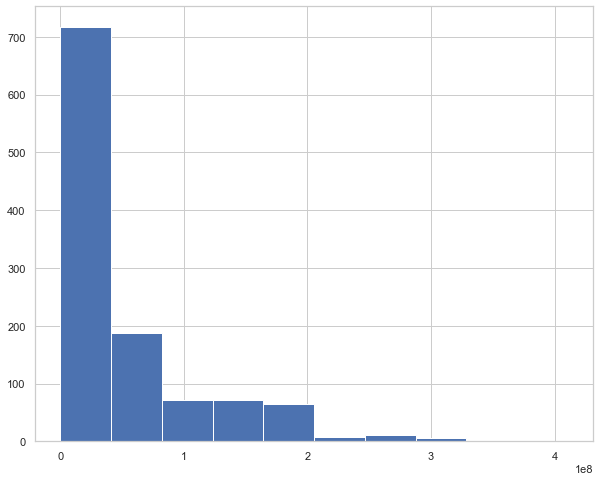

In [247]:
# Observe the OLD distribution of production budget with outliers removed
movie_gross_df.production_budget.hist();

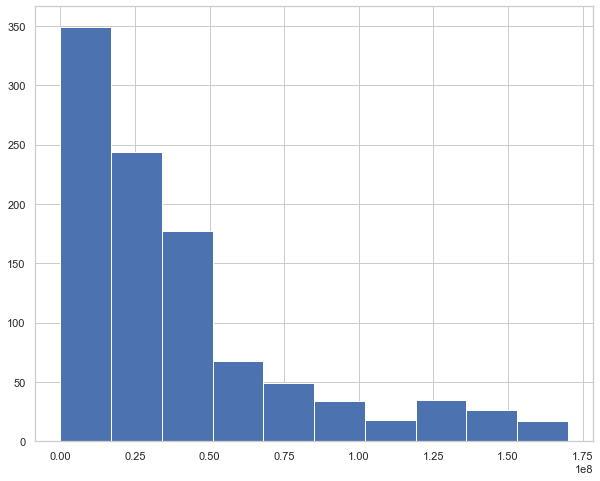

In [162]:
# Observe the NEW distribution of production budget with outliers removed
movie_gross_df_o.production_budget.hist();

Based the old and new distributions -- while overall it is right skewed, the severity is less with the removal the production budgets > $ 2 million

<AxesSubplot:>

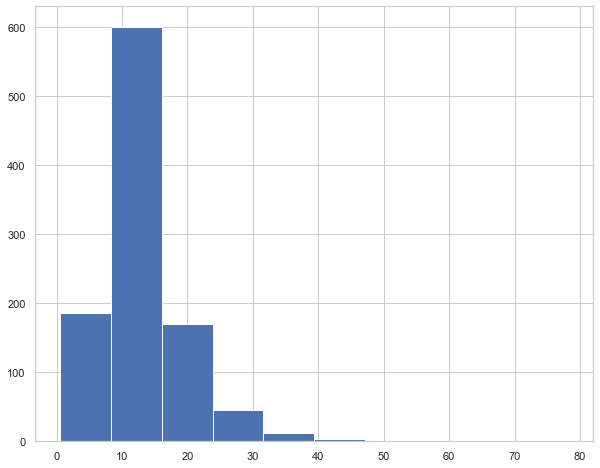

In [208]:
# Observe the distribution of popularity of movies
movie_gross_df_o.popularity.hist()

### Genre Exploration

In [163]:
# Get list of unique genres from dataframe
genres_list = [ x.split(',') for x in movie_gross_df_o['genres'].fillna('') ]
genres_list = [item for sublist in genres_list for item in sublist]
genres_list = list( set(genres_list) )
genres_list

['',
 'Adventure',
 'Horror',
 'Comedy',
 'Mystery',
 'Action',
 'Musical',
 'Crime',
 'Documentary',
 'History',
 'War',
 'Western',
 'Romance',
 'Drama',
 'Biography',
 'Fantasy',
 'Music',
 'Sport',
 'Sci-Fi',
 'Thriller',
 'Family',
 'Animation']

Create a genres dataframe splitting the movies to individual genres.However, because movies may be listed under multiple genres, there is an expecteation of duplicates

In [164]:
movie_gross_df_o.fillna('',inplace=True)

C:\Users\garci\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
movie_gross_df_o.isna().any()

idx                             False
tconst                          False
primary_title                   False
original_title                  False
start_year                      False
runtime_minutes                 False
genres                          False
idx                             False
title                           False
studio                          False
domestic_gross                  False
foreign_gross                   False
year                            False
movie                           False
year                            False
production_budget               False
tnb_domestic_gross              False
worldwide_gross                 False
title                           False
year                            False
popularity                      False
domestic_gross_budget_ratio     False
worldwide_gross_budget_ratio    False
dtype: bool

In [166]:
genres_df = pd.DataFrame()
for genre in genres_list[1:]:
    label_genre_df = movie_gross_df_o[ movie_gross_df_o['genres'].str.contains(genre) ]
    label_genre_df['genre_label'] = genre
    genres_df = genres_df.append(label_genre_df)
    
print(genres_df.shape)
genres_df.tail()

<ipython-input-166-09628b9c7538>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(2619, 24)


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label
298,7291,tt1402488,Happy Feet Two,Happy Feet Two,2011,100,"Adventure,Animation,Comedy",377,Happy Feet Two,WB,...,2011,135000000,64006466,157956466,Happy Feet Two,2011,8.131,0.474122,1.170048,Animation
1028,81825,tt4701724,Early Man,Early Man,2018,89,"Adventure,Animation,Comedy",3168,Early Man,LGF,...,2018,50000000,8267544,45285890,Early Man,2018,16.675,0.165351,0.905718,Animation
763,39299,tt2401878,Anomalisa,Anomalisa,2015,90,"Animation,Comedy,Drama",2051,Anomalisa,Par.,...,2015,8000000,3759286,5706168,Anomalisa,2015,10.285,0.469911,0.713271,Animation
764,39299,tt2401878,Anomalisa,Anomalisa,2015,90,"Animation,Comedy,Drama",2051,Anomalisa,Par.,...,2015,8000000,3759286,5706168,Anomalisa,2015,10.285,0.469911,0.713271,Animation
234,6485,tt1305591,Mars Needs Moms,Mars Needs Moms,2011,88,"Adventure,Animation,Family",449,Mars Needs Moms,BV,...,2011,150000000,21392758,39549758,Mars Needs Moms,2011,8.852,0.142618,0.263665,Animation


Remove outliers in genres_df

### Domestic Gross Profits by Genre

Text(0.5, 1.0, 'Domestic Gross Profits by Genre')

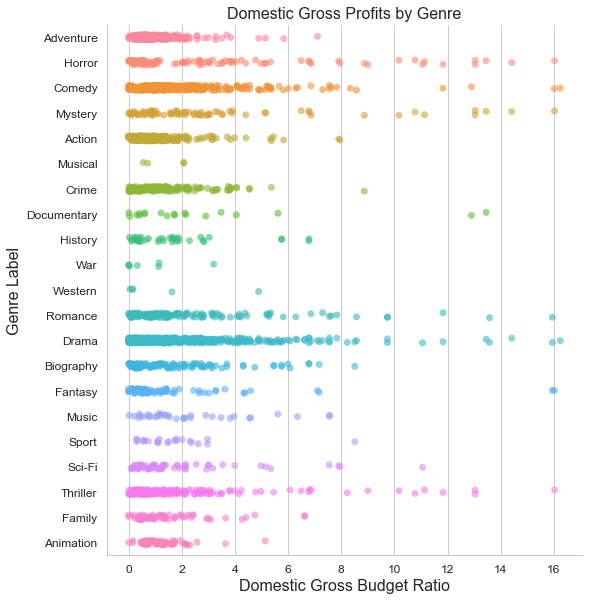

In [167]:
sns.catplot(x='domestic_gross_budget_ratio', y='genre_label', orient='h', s=7, alpha=0.6, height=8,data=genres_df)
plt.ylabel('Genre Label',fontsize=16)
plt.xlabel('Domestic Gross Budget Ratio',fontsize=16)
plt.tick_params(labelsize=12)
plt.title('Domestic Gross Profits by Genre',fontsize=16)

### Worldwide Gross Profits by Genre

Text(0.5, 1.0, 'Worldwide Gross Profits by Genre')

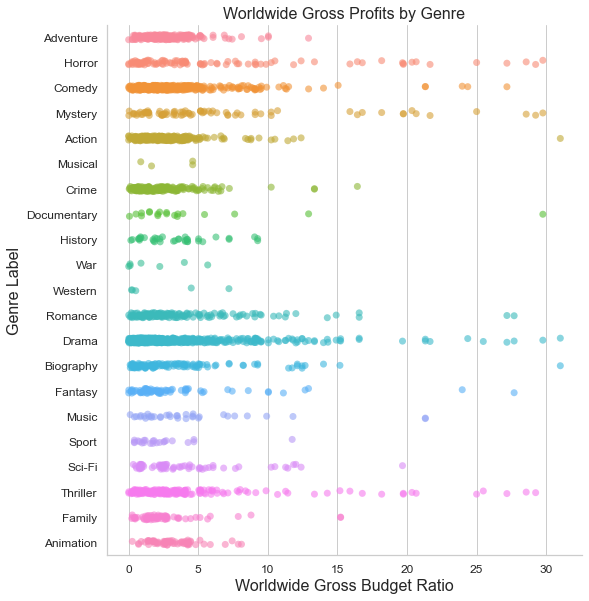

In [168]:
sns.catplot(x='worldwide_gross_budget_ratio', y='genre_label', orient='h', s=7, alpha=0.6, height=8,data=genres_df)
plt.ylabel('Genre Label',fontsize=16)
plt.xlabel('Worldwide Gross Budget Ratio',fontsize=16)
plt.tick_params(labelsize=12)
plt.title('Worldwide Gross Profits by Genre',fontsize=16)

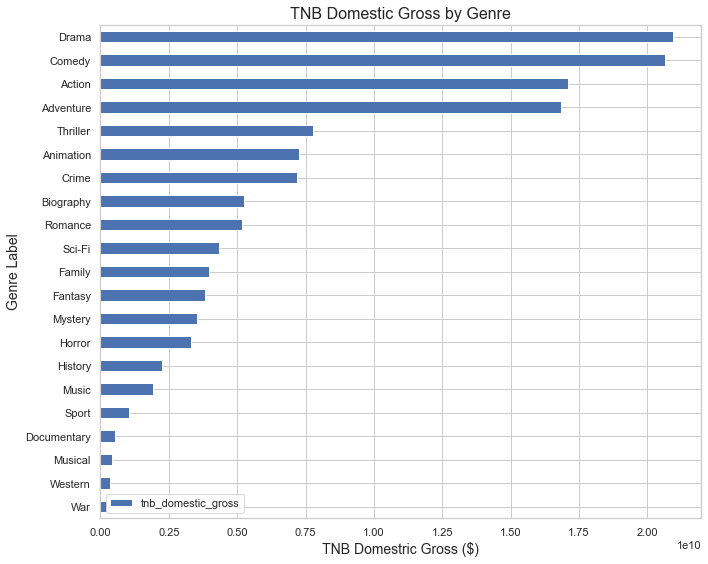

In [278]:
rcParams['figure.figsize'] = 10,8

pd.DataFrame(genres_df.groupby('genre_label')['tnb_domestic_gross'].agg('sum')).sort_values('tnb_domestic_gross').plot(kind='barh');
plt.xlabel('TNB Domestric Gross ($)',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('TNB Domestic Gross by Genre',fontsize=16)
plt.tight_layout()
plt.savefig('domestic_gross.jpg',dpi=300)

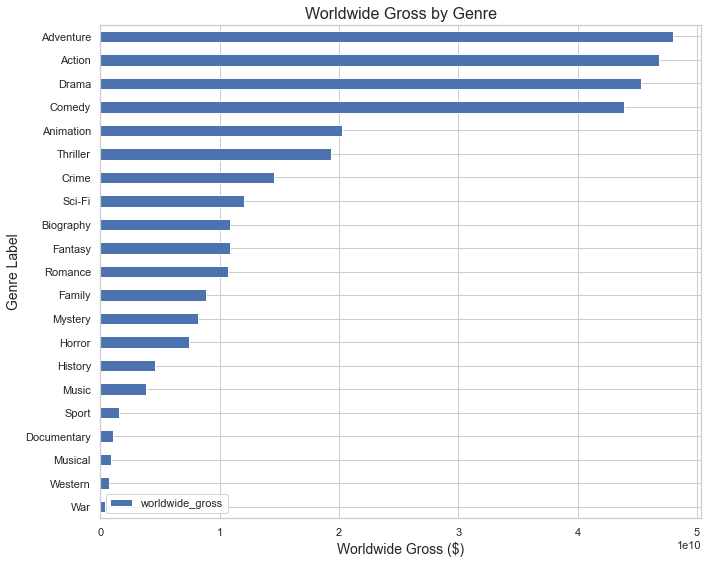

In [279]:
pd.DataFrame(genres_df.groupby('genre_label')['worldwide_gross'].agg('sum')).sort_values('worldwide_gross').plot(kind='barh')

plt.xlabel('Worldwide Gross ($)',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('Worldwide Gross by Genre',fontsize=16)
plt.tight_layout()
plt.savefig('worldwide_gross_bar.jpg',dpi=300)

From the two bar charts above, when it comes to top genres, the top 4 consist of Adventure, Action, Comedy and Drama with slight variation between their positioning.

In [263]:
domestic_mean_profit_df = pd.DataFrame(genres_df.groupby('genre_label')['domestic_gross_budget_ratio'].agg('mean'))
domestic_mean_profit_df = domestic_mean_profit_df.sort_values('domestic_gross_budget_ratio').reset_index()
domestic_mean_profit_df.head()

,genre_label,domestic_gross_budget_ratio
0,War,0.834008
1,Action,1.083982
2,Adventure,1.143539
3,Animation,1.230574
4,Crime,1.343632


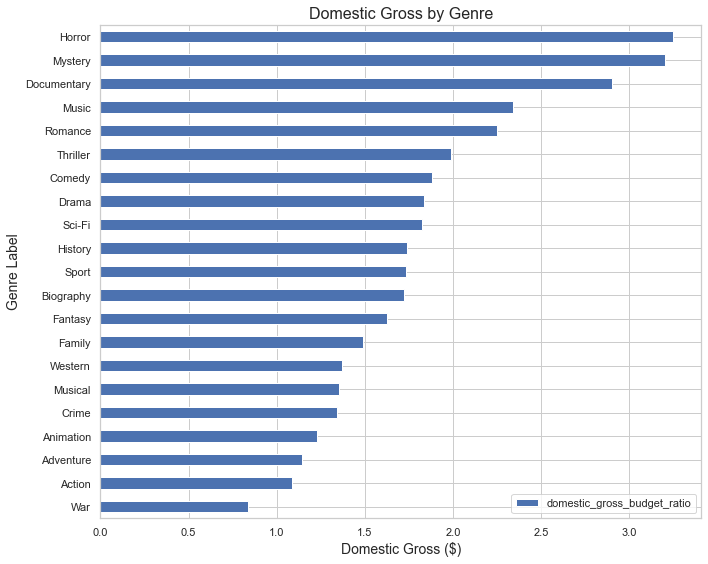

In [273]:
domestic_mean_profit_df.set_index('genre_label').plot.barh()
plt.xlabel('Domestic Gross ($)',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('Domestic Gross by Genre',fontsize=16)
plt.tight_layout()
plt.savefig('domestic_gross_bar.jpg',dpi=300)

In [274]:
domestic_median_profit_df = pd.DataFrame(genres_df.groupby('genre_label')['domestic_gross_budget_ratio'].agg('median'))
domestic_median_profit_df = domestic_median_profit_df.sort_values('domestic_gross_budget_ratio').reset_index()
domestic_median_profit_df.head()

,genre_label,domestic_gross_budget_ratio
0,Western,0.151874
1,War,0.324298
2,Fantasy,0.688886
3,Action,0.858557
4,Adventure,0.930525


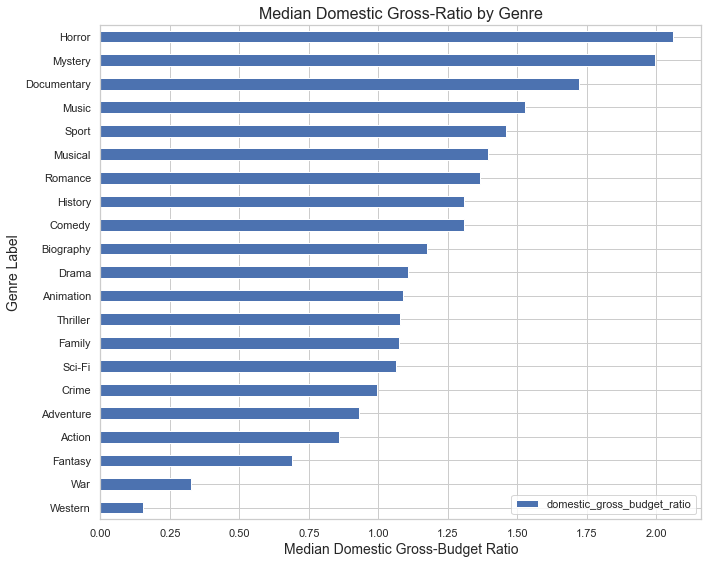

In [276]:
domestic_median_profit_df.set_index('genre_label').plot.barh()
plt.xlabel('Median Domestic Gross-Budget Ratio',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('Median Domestic Gross-Ratio by Genre',fontsize=16)
plt.tight_layout()
plt.savefig('median_domestic_gross_ratio_bar.jpg',dpi=300)

In [175]:
worldwide_mean_profit_df = pd.DataFrame(genres_df.groupby('genre_label')['worldwide_gross_budget_ratio'].agg('mean'))
worldwide_mean_profit_df = worldwide_mean_profit_df.sort_values('worldwide_gross_budget_ratio',ascending=False).reset_index()
worldwide_mean_profit_df.head()

,genre_label,worldwide_gross_budget_ratio
0,Mystery,6.791905
1,Horror,6.431273
2,Music,4.670360
3,Documentary,4.595779
4,Thriller,4.474388


In [265]:
worldwide_median_profit_df = pd.DataFrame(genres_df.groupby('genre_label')['worldwide_gross_budget_ratio'].agg('median'))
worldwide_median_profit_df = worldwide_median_profit_df.sort_values('worldwide_gross_budget_ratio').reset_index()
worldwide_median_profit_df.head()

,genre_label,worldwide_gross_budget_ratio
0,Western,0.513598
1,War,0.888465
2,Sport,1.745181
3,Family,2.009261
4,Fantasy,2.036009


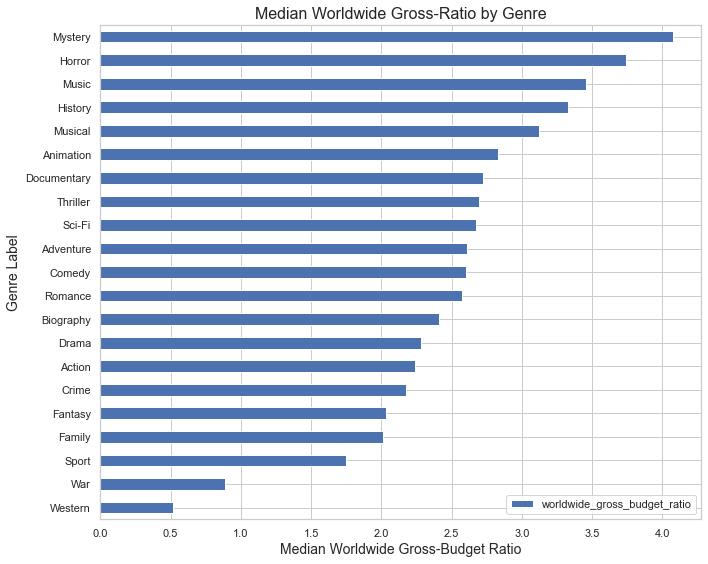

In [280]:
worldwide_median_profit_df.set_index('genre_label').plot.barh()
plt.xlabel('Median Worldwide Gross-Budget Ratio',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('Median Worldwide Gross-Ratio by Genre',fontsize=16)
plt.tight_layout()
plt.savefig('median_worldwide_gross_ratio_bar.jpg',dpi=300)

### Split movies into 3 categories production budget: Low, Medium, High

We have an idea OVERALL of what are the most profitable type genres of films. Lets look into how these genres are segmented when we split the production into 3 tiers
- Low
- Medium
- High

Use pandas.cut to divide up the production budget

In [178]:
pd.cut(movie_gross_df_o.production_budget, 3, retbins=True)

(1057    (-119950.0, 56700000.0]
 1068    (-119950.0, 56700000.0]
 1034    (-119950.0, 56700000.0]
 604     (-119950.0, 56700000.0]
 667     (-119950.0, 56700000.0]
                  ...           
 653     (-119950.0, 56700000.0]
 536     (-119950.0, 56700000.0]
 361     (-119950.0, 56700000.0]
 299     (-119950.0, 56700000.0]
 725     (-119950.0, 56700000.0]
 Name: production_budget, Length: 1017, dtype: category
 Categories (3, interval[float64]): [(-119950.0, 56700000.0] < (56700000.0, 113350000.0] < (113350000.0, 170000000.0]],
 array([-1.1995e+05,  5.6700e+07,  1.1335e+08,  1.7000e+08]))

In [179]:
movie_gross_df_o['budget_label'] = pd.cut(movie_gross_df_o.production_budget, 3, labels=['Low', 'Medium', 'High'])
movie_gross_df_o.head()

<ipython-input-179-362673a81254>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,budget_label
1057,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,2016,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Low
1068,92110,tt5328340,Lights Out,Lights Out,2016,90,Documentary,2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302,Low
1034,82941,tt4786282,Lights Out,Lights Out,2016,81,"Drama,Horror,Mystery",2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302,Low
604,22460,tt1922777,Sinister,Sinister,2012,110,"Horror,Mystery,Thriller",808,Sinister,LG/S,...,2012,3000000,48086903,87727807,Sinister,2012,13.117,16.028968,29.242602,Low
667,28752,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88,"Horror,Mystery,Thriller",777,Paranormal Activity 4,Par.,...,2012,5000000,53900335,142817992,Paranormal Activity 4,2012,8.965,10.780067,28.563598,Low


## Genre Analysis -- Domestic & Worldwide Gross Ratio as a Success Metric

### Observe same metrics for profits and top grossing and observe how they differ between budget categories

#### Low budget --> genre analysis

In [180]:
genres_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label
672,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,2012,1800000,12795746,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Adventure
1077,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,2017,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure
1078,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,2017,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure
1026,81750,tt4698684,Hunt for the Wilderpeople,Hunt for the Wilderpeople,2016,101,"Adventure,Comedy,Drama",2517,Hunt for the Wilderpeople,Orch.,...,2016,2500000,5205471,23845533,Hunt for the Wilderpeople,2016,12.545,2.082188,9.538213,Adventure
1063,90243,tt5220122,Hotel Transylvania 3: Summer Vacation,Hotel Transylvania 3: Summer Vacation,2018,97,"Adventure,Animation,Comedy",3095,Hotel Transylvania 3: Summer Vacation,Sony,...,2018,65000000,167500092,527079962,Hotel Transylvania 3: Summer Vacation,2018,26.815,2.576924,8.108922,Adventure


In [181]:
# Join movie_gross_df_o (with remove outliers) and genres_df_o without outliers to append budget_label columns
movie_budget_genres_df = pd.merge( genres_df, movie_gross_df_o[['tconst','budget_label']], on='tconst', how='inner' )
print(movie_budget_genres_df.shape)
movie_budget_genres_df.head()

(3055, 25)


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label
0,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,1800000,12795746,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Adventure,Low
1,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,1800000,12795746,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Drama,Low
2,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,1800000,12795746,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Fantasy,Low
3,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low
4,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low


In [182]:
low_budget_df = movie_budget_genres_df[movie_budget_genres_df['budget_label']=='Low']
print( low_budget_df.shape )
low_budget_df.head()

(2288, 25)


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label
0,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,1800000,12795746,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Adventure,Low
1,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,1800000,12795746,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Drama,Low
2,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,1800000,12795746,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Fantasy,Low
3,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low
4,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low


<AxesSubplot:xlabel='worldwide_gross_budget_ratio', ylabel='genre_label'>

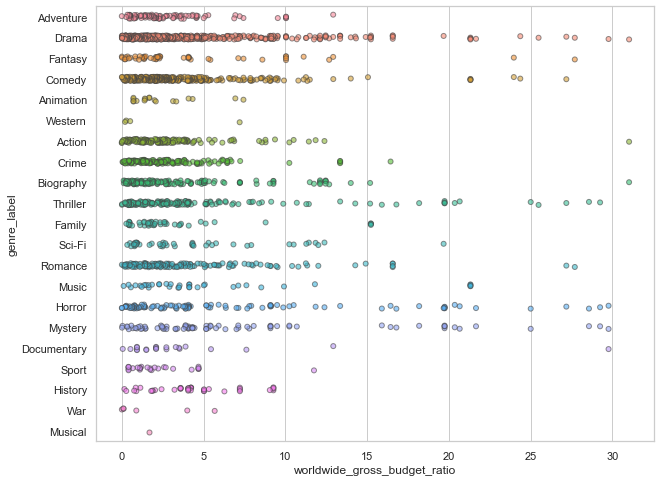

In [183]:
# Investigate the distribution of movie genres with a striplpot
sns.stripplot(x="worldwide_gross_budget_ratio", y="genre_label", data=low_budget_df, linewidth=1, dodge=True, alpha=0.6)

In [184]:
movie_gross_df_o.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,budget_label
1057,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,2016,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Low
1068,92110,tt5328340,Lights Out,Lights Out,2016,90,Documentary,2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302,Low
1034,82941,tt4786282,Lights Out,Lights Out,2016,81,"Drama,Horror,Mystery",2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302,Low
604,22460,tt1922777,Sinister,Sinister,2012,110,"Horror,Mystery,Thriller",808,Sinister,LG/S,...,2012,3000000,48086903,87727807,Sinister,2012,13.117,16.028968,29.242602,Low
667,28752,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88,"Horror,Mystery,Thriller",777,Paranormal Activity 4,Par.,...,2012,5000000,53900335,142817992,Paranormal Activity 4,2012,8.965,10.780067,28.563598,Low


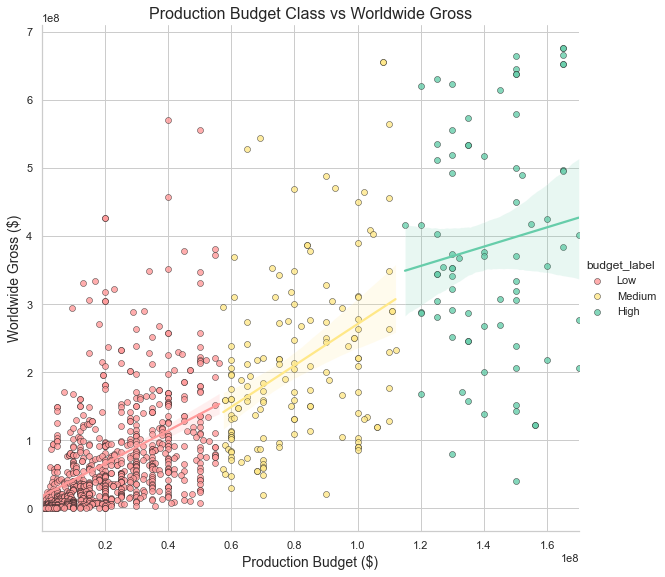

In [284]:
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='production_budget', y='worldwide_gross', hue='budget_label', 
                palette={"Low": "#FF9999", "Medium": "#FFE888", "High": '#66CDAA'},
                data=movie_gross_df_o, fit_reg=True, legend=True,height=8,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))
plt.xlabel('Production Budget ($)',fontsize=14)
plt.ylabel('Worldwide Gross ($)',fontsize=14)
plt.title('Production Budget Class vs Worldwide Gross',fontsize=16)
# plt.tight_layout()
plt.savefig('ProductionBudgetClassvsWorldwide Gross.jpg',dpi=300)

There appears to be a positive correlation between production budget and worldwide_gross

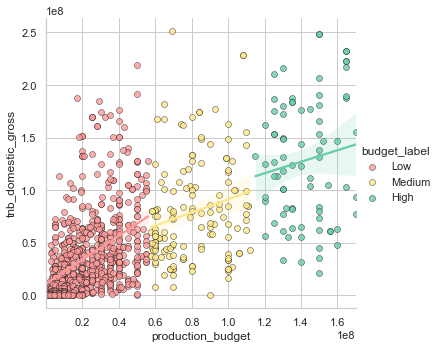

In [186]:
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='production_budget', y='tnb_domestic_gross', hue='budget_label', 
                palette={"Low": "#FF9999", "Medium": "#FFE888", "High": '#66CDAA'},
                data=movie_gross_df_o, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))


A similar trend is apparent with tnb_domestic_gross

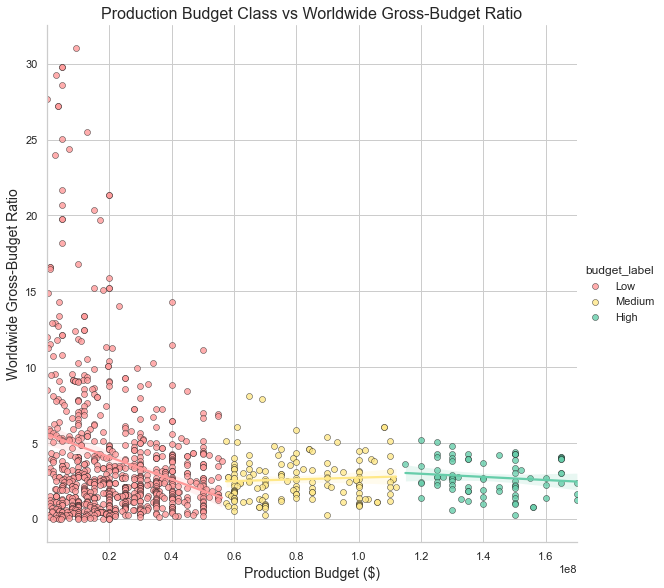

In [324]:
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='production_budget', y='worldwide_gross_budget_ratio', hue='budget_label', 
                palette={"Low": "#FF9999", "Medium": "#FFE888", "High": '#66CDAA'},
                data=movie_gross_df_o, fit_reg=True, legend=True, height=8,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))    

plt.xlabel('Production Budget ($)',fontsize=14)
plt.ylabel('Worldwide Gross-Budget Ratio',fontsize=14)
plt.title('Production Budget Class vs Worldwide Gross-Budget Ratio',fontsize=16)
# plt.tight_layout()
plt.savefig('ProductionBudgetClassvsWorldwideGrossRatio.jpg',dpi=300,bbox_inches = 'tight')

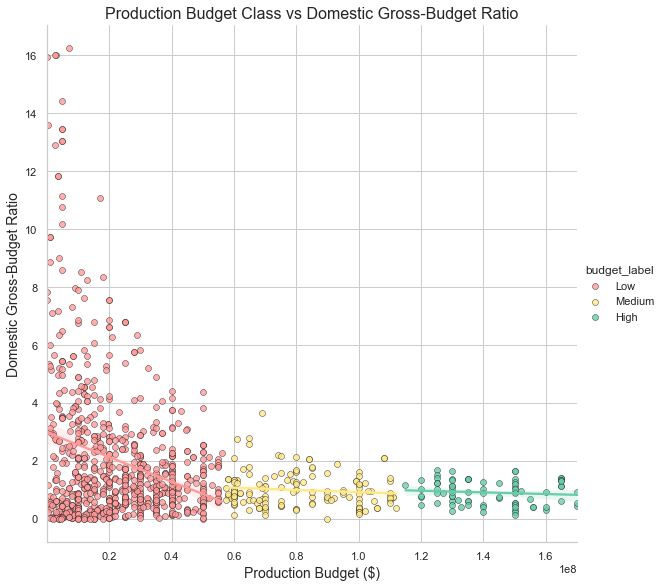

In [325]:
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='production_budget', y='domestic_gross_budget_ratio', hue='budget_label', 
                palette={"Low": "#FF9999", "Medium": "#FFE888", "High": '#66CDAA'},
                data=movie_gross_df_o, fit_reg=True, legend=True, height=8,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

plt.xlabel('Production Budget ($)',fontsize=14)
plt.ylabel('Domestic Gross-Budget Ratio',fontsize=14)
plt.title('Production Budget Class vs Domestic Gross-Budget Ratio',fontsize=16)
# plt.tight_layout()
plt.savefig('ProductionBudgetClassvsDomesticGrossRatio.jpg',dpi=300,bbox_inches = 'tight')

In spite of a seemingly positive correlation between production_budget and worldwide_gross & tnb_domestic_gross. There doesn't appear to be a correlation between production budget and the profits made.

Given the L-shape of the scatter plot. Many appear to break even or make little profit

Let's get a closer look into how the genres break up between the different budget_labels

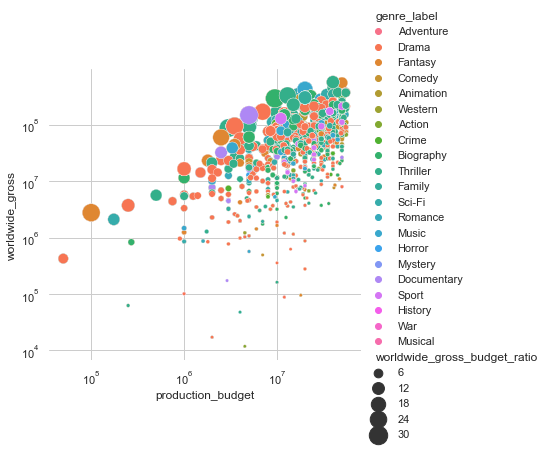

In [189]:
sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=low_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 350),
)

g.set(xscale="log", yscale="log")
# g.ax.xaxis.grid(True, "minor", linewidth=.25)
# g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);

In [219]:
genres_worldwide_gross_median = pd.DataFrame(genres_df.groupby('genre_label')['worldwide_gross'].agg('median'))
genres_worldwide_gross_median = genres_worldwide_gross_median.sort_values('worldwide_gross',ascending=False).reset_index()
genres_worldwide_gross_median.head()

,genre_label,worldwide_gross
0,Animation,280644613.5
1,Musical,238609112.5
2,Adventure,177241171.0
3,History,122603824.0
4,Sci-Fi,115024804.0


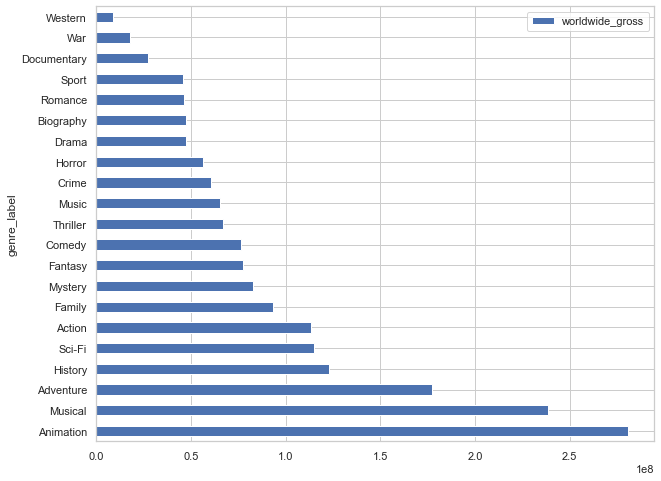

In [220]:
genres_worldwide_gross_median.set_index('genre_label').plot.barh();

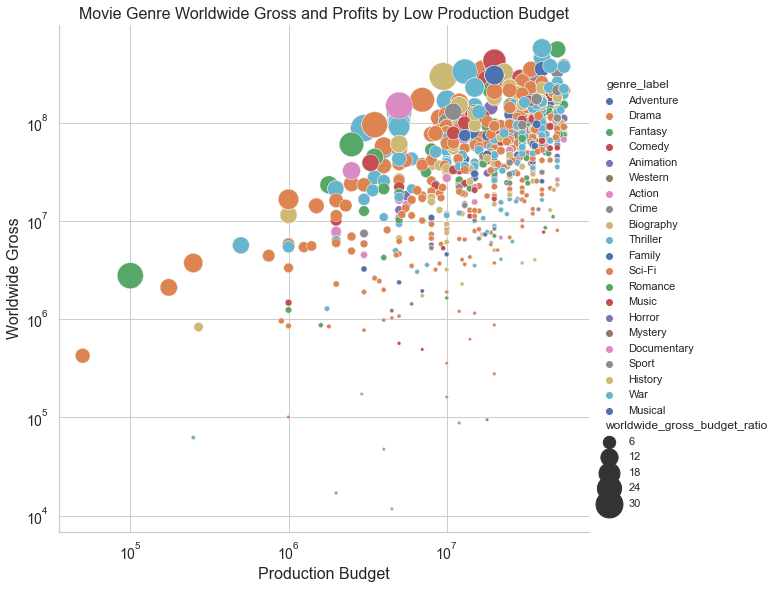

In [322]:
sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=low_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 750),height=8, palette = 'deep'
)

g.set(xscale="log", yscale="log")
plt.tick_params(labelsize=14)
plt.ylabel('Worldwide Gross',fontsize=16)
plt.xlabel('Production Budget',fontsize=16)
plt.title('Movie Genre Worldwide Gross and Profits by Low Production Budget',fontsize=16)
# plt.tight_layout()
plt.savefig('MovieGenreWorldwideProfits_LowBudget.jpg',dpi=300,bbox_inches = 'tight')

#### Explore the use of using Plotly

In [193]:
fig = px.scatter(low_budget_df, x="production_budget", y="tnb_domestic_gross", color="genre_label",
                 size='domestic_gross_budget_ratio',log_y=True, log_x=True, width=900, height=600)

fig.show()

In [194]:
fig = px.scatter(low_budget_df, x="production_budget", y="worldwide_gross", color="genre_label",
                 size='worldwide_gross_budget_ratio',log_y=True, log_x=True,width=900, height=600)

fig.show()

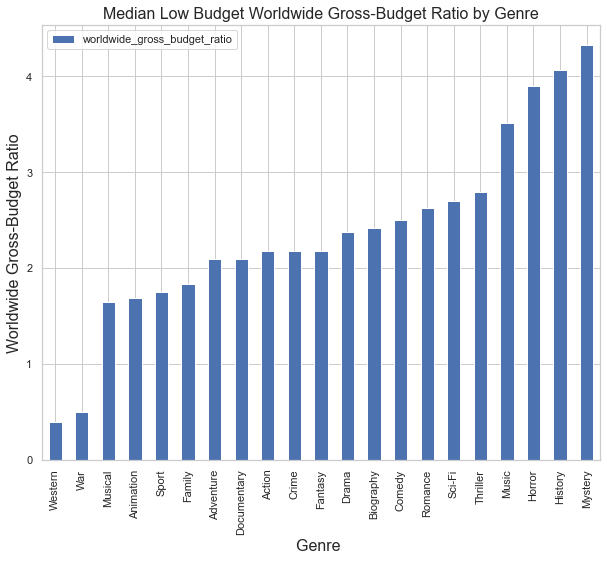

In [332]:
pd.DataFrame(low_budget_df.groupby('genre_label')['worldwide_gross_budget_ratio'].median()).sort_values('worldwide_gross_budget_ratio').plot.bar()
plt.ylabel('Worldwide Gross-Budget Ratio',fontsize=16)
plt.xlabel('Genre ',fontsize=16)
plt.title('Median Low Budget Worldwide Gross-Budget Ratio by Genre',fontsize=16)
plt.savefig('MedianLowBudgetWorldwideGross-BudgetRatiobyGenre.jpg',dpi=300,bbox_inches = 'tight')

#### Medium Budget --> genre analysis - Seaborn

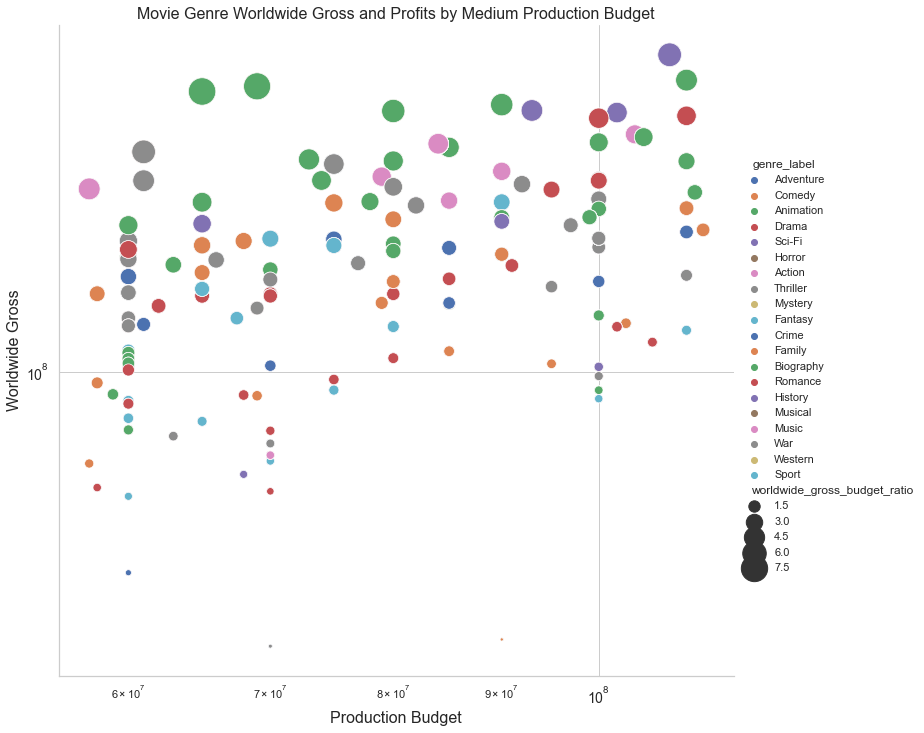

In [327]:
med_budget_df = movie_budget_genres_df[movie_budget_genres_df['budget_label']=='Medium']

g = sns.relplot(
    data=med_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 750),height=10, palette = 'deep'
)

g.set(xscale="log", yscale="log")
plt.tick_params(labelsize=14)
plt.ylabel('Worldwide Gross',fontsize=16)
plt.xlabel('Production Budget',fontsize=16)
plt.title('Movie Genre Worldwide Gross and Profits by Medium Production Budget',fontsize=16)
plt.savefig('MovieGenreWorldwideProfits_MedBudget',dpi=300,bbox_inches = 'tight')

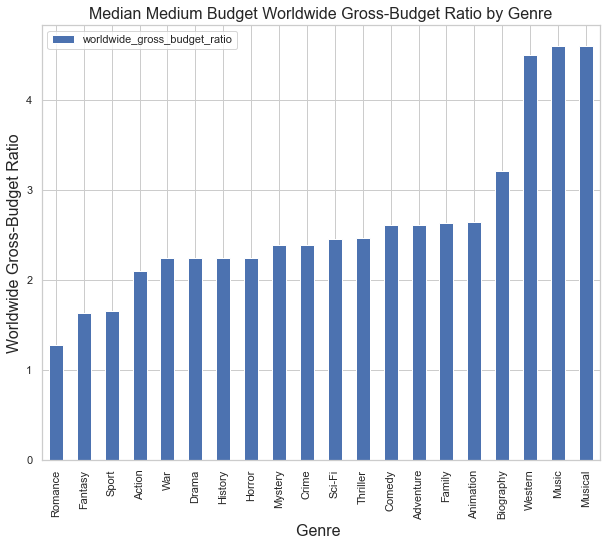

In [326]:
pd.DataFrame(med_budget_df.groupby('genre_label')['worldwide_gross_budget_ratio'].median()).sort_values('worldwide_gross_budget_ratio').plot.bar()
plt.ylabel('Worldwide Gross-Budget Ratio',fontsize=16)
plt.xlabel('Genre ',fontsize=16)
plt.title('Median Medium Budget Worldwide Gross-Budget Ratio by Genre',fontsize=16)
plt.savefig('MedianMedBudgetWorldwideGross-BudgetRatiobyGenre.jpg',dpi=300,bbox_inches = 'tight')

#### High budget --> genre analysis

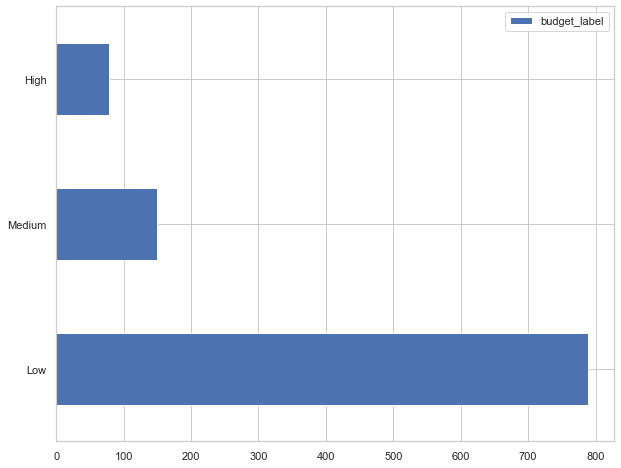

In [196]:
pd.DataFrame(movie_gross_df_o.budget_label.value_counts()).plot.barh();

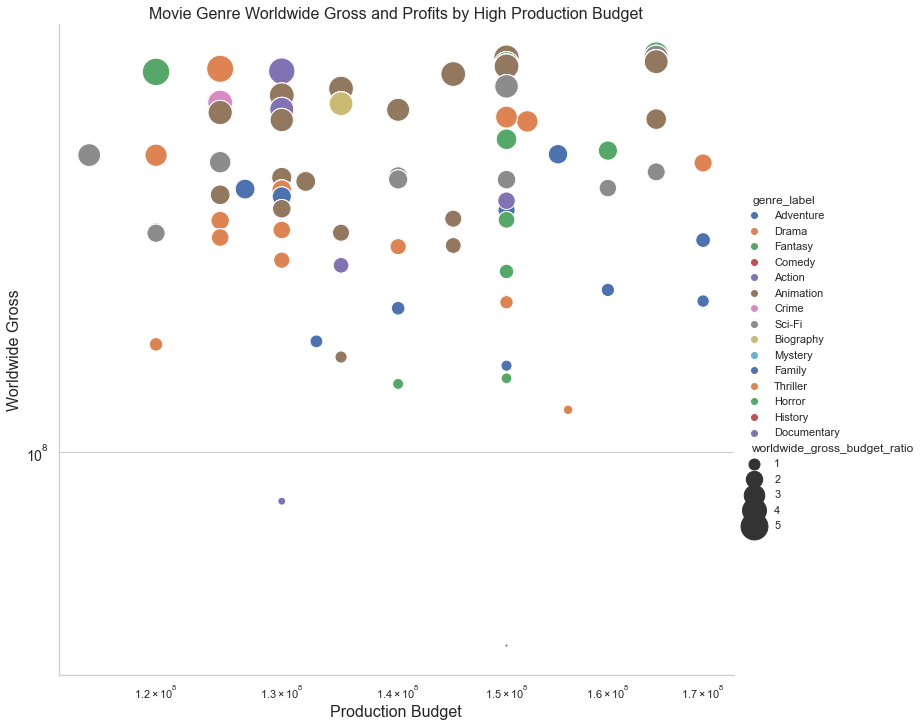

In [333]:
high_budget_df = movie_budget_genres_df[movie_budget_genres_df['budget_label']=='High']

g = sns.relplot(
    data=high_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 750),height=10, palette = 'deep'
)

g.set(xscale="log", yscale="log")
plt.tick_params(labelsize=14)
plt.ylabel('Worldwide Gross',fontsize=16)
plt.xlabel('Production Budget',fontsize=16)
plt.title('Movie Genre Worldwide Gross and Profits by High Production Budget',fontsize=16)
plt.savefig('MovieGenreWorldwideProfits_HighBudget',dpi=300,bbox_inches = 'tight')

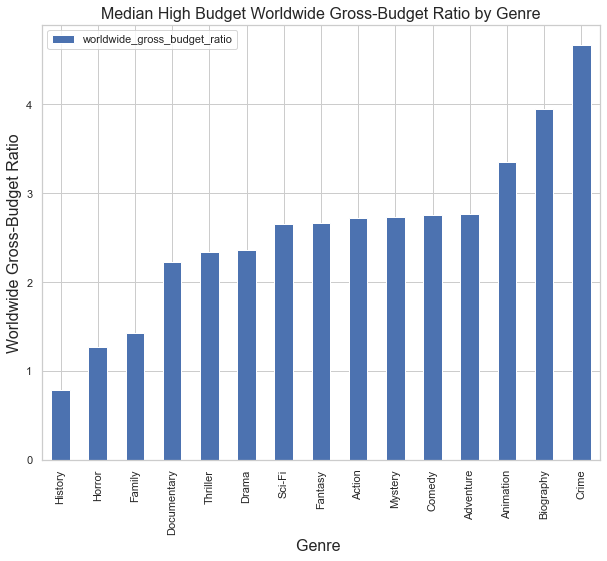

In [330]:
pd.DataFrame(high_budget_df.groupby('genre_label')['worldwide_gross_budget_ratio'].median()).sort_values('worldwide_gross_budget_ratio').plot.bar()
plt.ylabel('Worldwide Gross-Budget Ratio',fontsize=16)
plt.xlabel('Genre ',fontsize=16)
plt.title('Median High Budget Worldwide Gross-Budget Ratio by Genre',fontsize=16)
plt.savefig('MedianHighBudgetWorldwideGross-BudgetRatiobyGenre.jpg',dpi=300,bbox_inches = 'tight')

Notes:
- Try to visualize with Plotly or Altair 
- Dots difficult to be sure
- Libraries above are more interactive
- Need to make clear between genres

Alternative:
- Loop over unique genres;
- Plot distribution of budget ratio -- do for individudual group
- distributions likely not normally distributed
- bootstrapping
- collect a series of random samples

#### Genre by Genre comparison

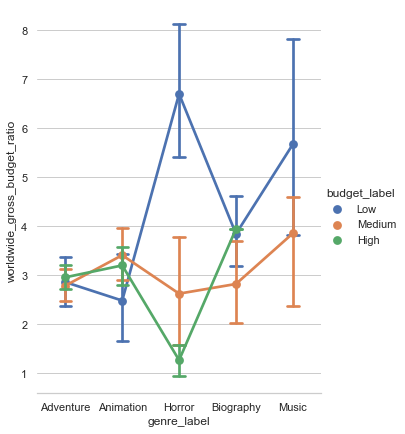

In [303]:
selected_genres = ['Horror','Adventure','Sci-Fi','Action','Animation']
selected_genres = ['Horror', 'Mystery', 'Documentary', 'Sport', 'Romance']
selected_genres = ['Horror','Biography','Music','Animation','Adventure']
selected_genres_df = movie_budget_genres_df[movie_budget_genres_df['genre_label'].isin(selected_genres)]

sns.set_theme(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="genre_label", y="worldwide_gross_budget_ratio", hue="budget_label",
                capsize=.2, height=6, aspect=.75, kind="point", data=selected_genres_df)
g.despine(left=True);

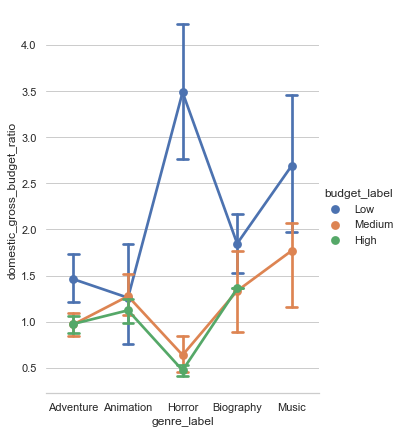

In [304]:
# selected_genres = ['Horror','Adventure','Sci-Fi','Action','Animation']
selected_genres_df = movie_budget_genres_df[movie_budget_genres_df['genre_label'].isin(selected_genres)]

sns.set_theme(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="genre_label", y="domestic_gross_budget_ratio", hue="budget_label",
                capsize=.2, height=6, aspect=.75, kind="point", data=selected_genres_df)
g.despine(left=True);

In [305]:
selected_genres_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label
0,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,1800000,12795746,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Adventure,Low
3,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low
4,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low
5,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low
6,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low


C:\Users\garci\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\garci\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\garci\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level fu

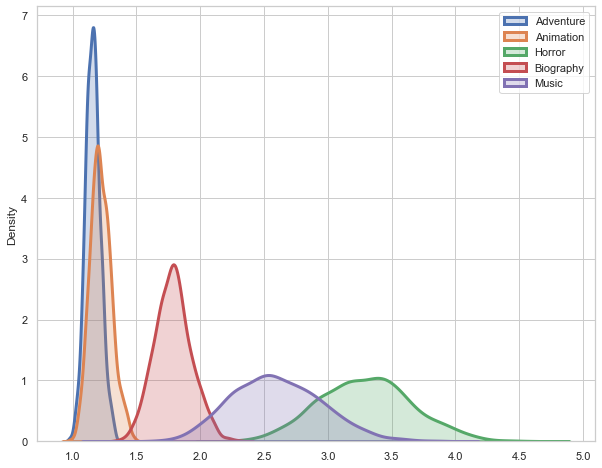

In [306]:
for genre in selected_genres_df.genre_label.unique():
    frame = selected_genres_df[selected_genres_df.genre_label==genre]
    sample_means = [np.random.choice(frame.domestic_gross_budget_ratio, replace=True, size=len(frame)).mean() for x in range(1000)]
#     plt.hist(sample_means, label=genre)
    sns.distplot(sample_means, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = genre)

plt.title('')
plt.legend()

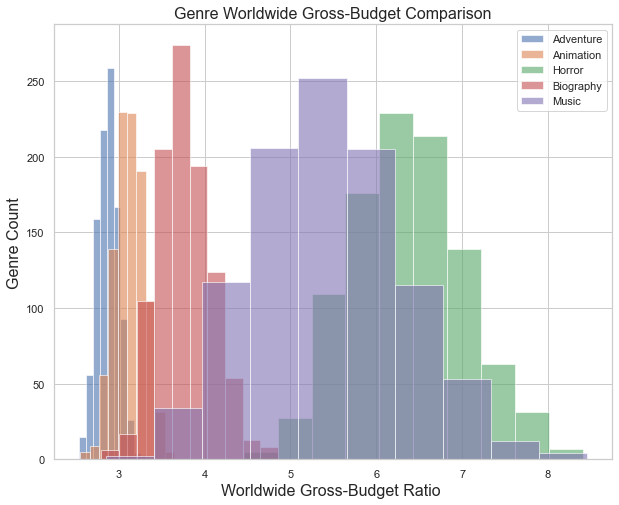

In [307]:
for genre in selected_genres_df.genre_label.unique():
    frame = selected_genres_df[selected_genres_df.genre_label==genre]
    sample_means = [np.random.choice(frame.worldwide_gross_budget_ratio, replace=True, size=len(frame)).mean() for x in range(1000)]
    plt.hist(sample_means, label=genre,alpha=0.6)

plt.legend()
plt.ylabel('Genre Count',fontsize=16)
plt.xlabel('Worldwide Gross-Budget Ratio ',fontsize=16)
plt.title('Genre Worldwide Gross-Budget Comparison',fontsize=16)
plt.savefig('GenreWorldwideGross-BudgetComparison.jpg',dpi=300)

## Investigate the ratings of films with the selected genres

Set up tables to join with genres tables
- imdb_title_ratings
- imdb_title_principals

- genres_df_o
- low_budget_df
- med_budget_df
- high_budget_df

In [308]:
selected_genres_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label
0,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,1800000,12795746,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Adventure,Low
3,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low
4,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low
5,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low
6,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,19500000,63859435,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low


In [309]:
title_ratings_df = pandas_df_sql("select tconst, averagerating, numvotes from imdb_title_ratings")
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [310]:
ratings_profits_df = pd.merge( selected_genres_df, title_ratings_df, on='tconst',how='inner' )
ratings_profits_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label,averagerating,numvotes
0,29329,tt2125435,Beasts of the Southern Wild,Beasts of the Southern Wild,2012,93,"Adventure,Drama,Fantasy",867,Beasts of the Southern Wild,FoxS,...,23265132,Beasts of the Southern Wild,2012,7.530,7.108748,12.925073,Adventure,Low,7.3,77440
1,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low,7.3,308112
2,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low,7.3,308112
3,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low,7.3,308112
4,95629,tt5580390,The Shape of Water,The Shape of Water,2017,123,"Adventure,Drama,Fantasy",2805,The Shape of Water,FoxS,...,195790794,The Shape of Water,2017,22.025,3.274843,10.040554,Adventure,Low,7.3,308112


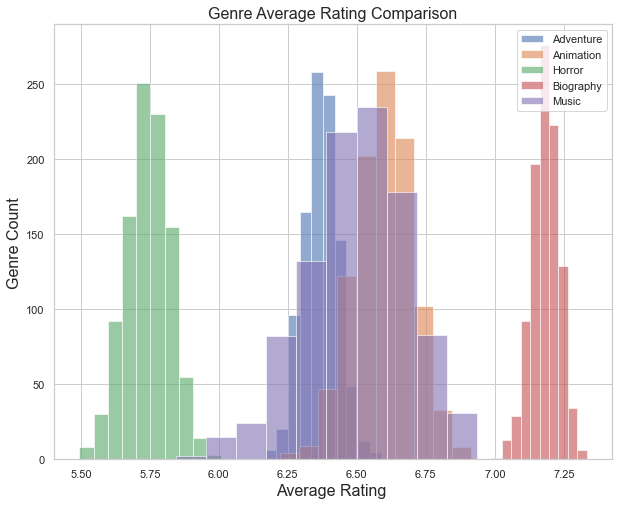

In [311]:
for genre in ratings_profits_df.genre_label.unique():
    frame = ratings_profits_df[ratings_profits_df.genre_label==genre]
    sample_means = [np.random.choice(frame.averagerating, replace=True, size=len(frame)).mean() for x in range(1000)]
    plt.hist(sample_means, label=genre,alpha=0.6)

plt.legend()
plt.ylabel('Genre Count',fontsize=16)
plt.xlabel('Average Rating ',fontsize=16)
plt.title('Genre Average Rating Comparison',fontsize=16)
plt.savefig('GenreAvgRatingComparison.jpg',dpi=300)

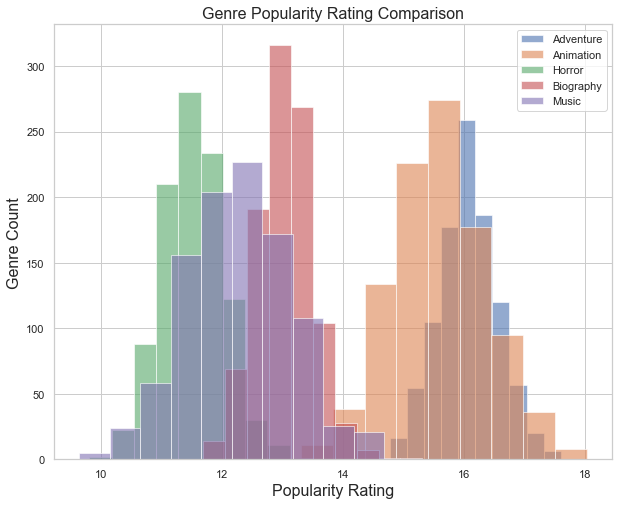

In [312]:
for genre in ratings_profits_df.genre_label.unique():
    frame = ratings_profits_df[ratings_profits_df.genre_label==genre]
    sample_means = [np.random.choice(frame.popularity, replace=True, size=len(frame)).mean() for x in range(1000)]
    plt.hist(sample_means, label=genre,alpha=0.6)

plt.legend()
plt.ylabel('Genre Count',fontsize=16)
plt.xlabel('Popularity Rating',fontsize=16)
plt.title('Genre Popularity Rating Comparison',fontsize=16)
plt.savefig('GenrePopularityRatingComparison.jpg',dpi=300)

## Director & Author Recommendation
- These directors are queried based on if they directed movies for a horror or mystery film
- Director and author on average has a tomatometer rating of 70 or higher

In [315]:
query = """
select directors, count(*) as movie_count, avg(tomatometer_rating) as avg_tomatometer_rating FROM rotten_tomatoes_movies
where genres like '%Horror%' or genres like '%Animation%' or genres like '%Adventure%' or genres like '%Biography%'
group by directors 
having avg_tomatometer_rating >= 70
order by movie_count desc
"""

director_df = pandas_df_sql(query)
director_df.head(10)

,directors,movie_count,avg_tomatometer_rating
0,Steven Spielberg,16,79.625000
1,Brian DePalma,13,70.153846
2,Roger Corman,12,70.916667
3,David Cronenberg,12,78.833333
4,Robert Zemeckis,11,74.000000
5,Peter Jackson,11,73.818182
6,Hayao Miyazaki,11,92.600000
7,Takashi Miike,10,71.000000
8,Sam Raimi,10,80.000000
9,John Sturges,10,72.300000


In [318]:
query = """
select authors, count(*) as movie_count, avg(tomatometer_rating) as avg_tomatometer_rating FROM rotten_tomatoes_movies
where genres like '%Horror%' or genres like '%Animation%' or genres like '%Adventure%' or genres like '%Biography%'
group by authors 
having avg_tomatometer_rating >= 70
order by movie_count desc
"""

author_df = pandas_df_sql(query)
author_df.head(10)

,authors,movie_count,avg_tomatometer_rating
0,Werner Herzog,6,90.166667
1,Quentin Tarantino,6,84.500000
2,Takeshi Kitano,5,73.200000
3,Steve Kloves,5,85.200000
4,Romeo Muller,5,78.600000
5,Richard Matheson,5,72.000000
6,Hayao Miyazaki,5,91.000000
7,David Koepp,5,70.000000
8,"Christopher Markus, Stephen McFeely",5,80.000000
9,Charles M. Schulz,5,95.500000


## Data Modeling
[EDIT - Not needed; replace with Data Analysis / Visualization]

Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Evaluation

[EDIT - Not needed; replace with Data Analysis / Visualization]

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

What I would recommend is for first the Microsoft stakeholders to question what is their expected production budget? Based on the trends, should they invest between $600,000 and $1,800,000, they can perhaps break even or 1.5 - 2 times that investment. However, should they invest less than $600,000, it is possible to double or quadruple that amount. The less money, the likelier they can multiply that investment.

Once broken down into budgets, Microsoft can then decide which genre of movie to initially explore. Based on the three paramaters of gross_budget ratio, average ratings, and popularity -- Horror and Mystery are the genres that stand out the most.

Lastly, based on the suggested genres of Horror and Mystery -- digging into the Rotten Tomatoes table, some directors that may be worth reaching out to (also depending on the budget, and alive status) include David Croenberg, Martin Scorsese, Steven Spielberg, Steven Soderbergh, and Sam Raimi

Nonetheless, based on the presented analysis, these results may not fully solve the business problem as it leaves to be desired the amount of marketing involved, region specific analyses should a smaller specific release be considered. With the movie going on hold during the pandemic, what does an the avenue of online streaming look like? Lastly, the directors and production teams that best fit the Horror and Mystery genre recommendations.

In the future, I would like to further add the data in rotten tomatoes as another dimension -- ratings from audience, critics, and perhaps create a sentiment analysis using the text data. Another direction is to understand the avenue of online streaming, and profits to be made there vs in-person movie going.